In [510]:
from sklearn.datasets import load_svmlight_file
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

# Distance
## Euclidean distance
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dc0281a964ec758cca02ab9ef91a7f54ac00d4b7">
## Cosine distance
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/a71c4add4abded66efd42b202c76f6a59944a587">

In [511]:
def euclideanDistance(a, b):
    
    temp = a - b
    temp = temp.multiply(temp)
    squaredSum = temp.sum()
    return sqrt(squaredSum)

In [512]:
def cosineDistance(a, b):
    
    temp = (a.multiply(b)).sum()
    normA = sqrt((a.multiply(a)).sum())
    normB = sqrt((b.multiply(b)).sum())
    """1 - cosineSimilarity"""
    return 1.0 - (temp/(normA * normB))

# K-means
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922">

## Cluster

In [513]:
"""Will only store indices. This is more efficient"""
class Cluster:
    
    def __init__(self, center, index):
        self.itemIndices = []
        self.mean = center
        self.itemIndices.append(index)
        
    def add(self, index):
        if index not in self.itemIndices:
            self.itemIndices.append(index)
    
    def remove(self, index):
        if index in self.itemIndices:
            self.itemIndices.remove(index)
    
    def contains(self, index):
        if index in self.itemIndices:
            return True
        else:
            return False
    
    def recenter(self, x):
        tmp = 0
        
        for index in self.itemIndices:
            tmp = tmp + x[index]
        self.mean = tmp/(len(self.itemIndices))
    
    def generateClusterLabel(self, y):
        
        self.frequencyDictionary = {}
        
        for index in self.itemIndices:
            if y[index] in self.frequencyDictionary:
                self.frequencyDictionary[y[index]] = self.frequencyDictionary[y[index]] + 1
            else:
                self.frequencyDictionary[y[index]] = 1
        
        target = None
        maxTargetFrequency = 0
        
        for key in self.frequencyDictionary:
            if self.frequencyDictionary[key] > maxTargetFrequency:
                target = key
                maxTargetFrequency = self.frequencyDictionary[key]
        self.target = target
    
    def plotCluster(self):
        val, weight = zip(*[(k, v) for k,v in self.frequencyDictionary.items()])
        plt.figure(figsize=(20, 10))
        plt.hist(val, weights=weight)
        plt.title("Cluster with target "+str(self.target))
        plt.xticks(list(self.frequencyDictionary.keys()))
        plt.xlabel("Class")
        plt.ylabel("Frequency")
        plt.show()
    
    def clusterDistortion(self, x):
        distortion = 0
        for index in self.itemIndices:
            distortion = distortion + euclideanDistance(x[index], self.mean)
        return distortion
    

## KMeans

In [514]:
class KmeansCluster:
    
    k = None
    distanceMetric = None
    clusters = None
    
    """Get distance from all clusters"""
    def getClusterDistance(self, x):
        
        distanceList = []
        for cluster in self.clusters:
            distanceList.append(self.distanceMetric(cluster.mean, x))
        return distanceList
        
    """Will fit on the training data"""
    def __init__(self, x, y = None, distanceMetric = euclideanDistance, k = 10, maxEpochs = 100):
        
        self.distanceMetric = distanceMetric
        self.k = k
        self.clusters = []
        
        """Create initial cluster randomly"""
        randomIndex = random.randint(0, x.shape[0] - 1)
        cluster = Cluster(x[randomIndex], randomIndex)
        self.clusters.append(cluster)
        
        """Generate subsequent clusters"""
        for i in range(1, self.k):
            
            distanceMetric = []
            for dataPoint in x:
                clusterDistance = self.getClusterDistance(dataPoint)
                distanceMetric.append(sum(clusterDistance))
            
            """Find the index with max distance"""
            index = distanceMetric.index(max(distanceMetric))
            
            """Create a cluster and add to list"""
            cluster = Cluster(x[index], index)
            self.clusters.append(cluster)
        
        """Clusters are created Now normalizing the clusters"""
        
        for i in range(0, maxEpochs):
            
            clusterUpdated = False
            for dataPointIndex, dataPoint in enumerate(x):
                clusterDistance = self.getClusterDistance(dataPoint)
                """Select cluster with minimum distance"""
                candidateClusterIndex = clusterDistance.index(min(clusterDistance))
                
                if not self.clusters[candidateClusterIndex].contains(dataPointIndex):
                    clusterUpdated = True
                    
                    for cluster in self.clusters:
                        if cluster.contains(dataPointIndex):
                            cluster.remove(dataPointIndex)
                            break
                    
                    self.clusters[candidateClusterIndex].add(dataPointIndex)
                
            if clusterUpdated:
                """Calculate new mean"""
                for cluster in self.clusters:
                    cluster.recenter(x)
            else:
                print("KMeans converged")
                break
        
        """Calculate cluster quality"""
        distortion = 0
        for cluster in self.clusters:
            distortion = distortion + cluster.clusterDistortion(x)
        self.distortion = distortion
        
        """Cluster converged. Generate labels"""
        if y is not None:
            for cluster in self.clusters:
                cluster.generateClusterLabel(y)
        
    def plotClusterQuality(self):
        
        for cluster in self.clusters:
            cluster.plotCluster()

# Read data

In [515]:
data = load_svmlight_file('Data/iris.scale.txt')
x = data[0]
y = data[1]

## Clustering using Euclidian Distance

In [518]:
kmeans = KmeansCluster(x, y, euclideanDistance, 3, 100)
print("Cluster distortion "+str(kmeans.distortion))

KMeans converged
Cluster distortion 58.55770236541425


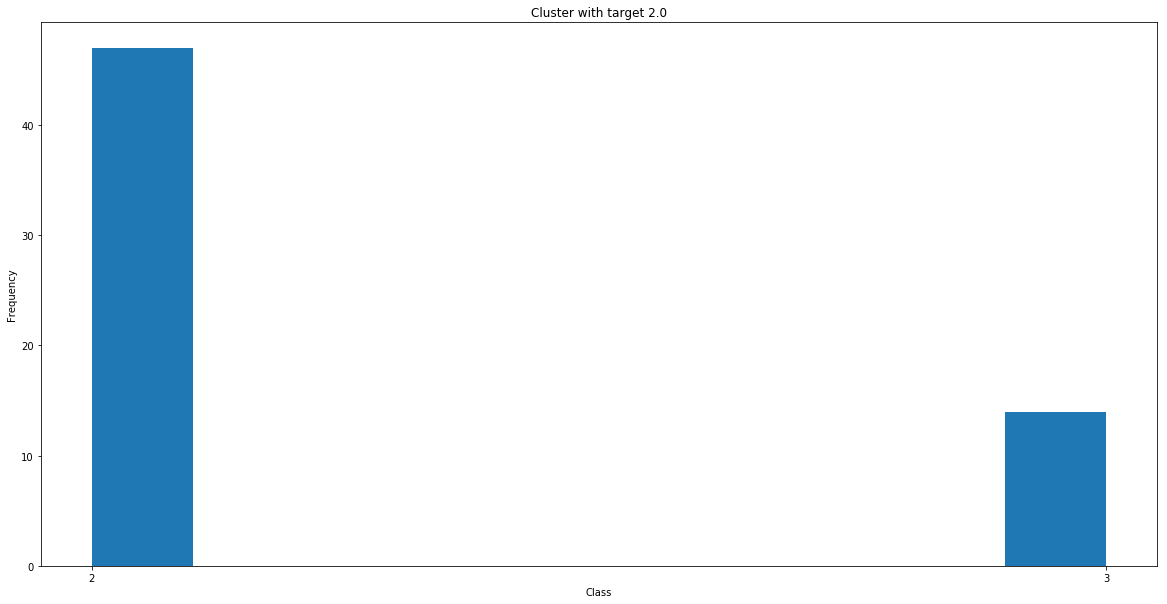

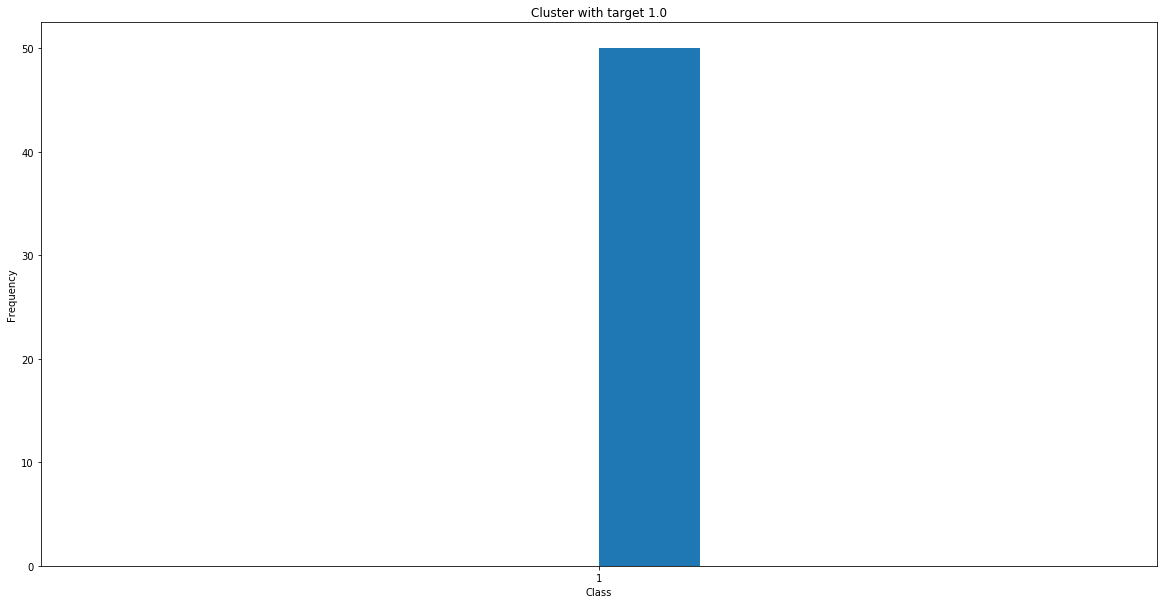

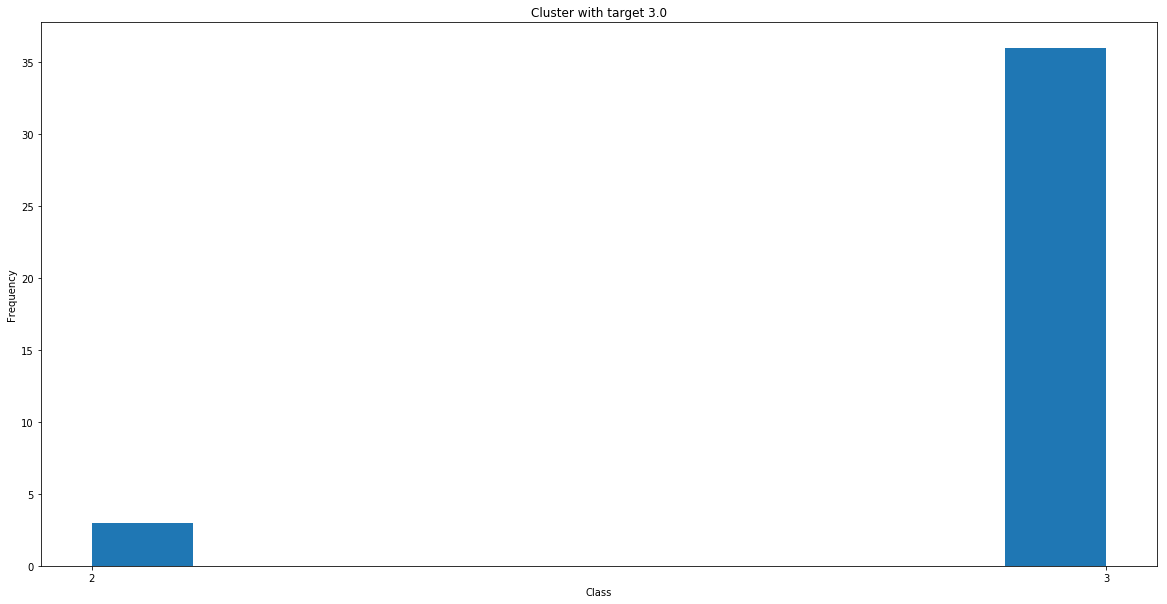

In [517]:
kmeans.plotClusterQuality()

In [520]:
k = range(1, 8)
distortions = []

for i in k:
    kmeans = KmeansCluster(x, y, euclideanDistance, i, 100)
    distortions.append(kmeans.distortion)

KMeans converged
KMeans converged
KMeans converged
KMeans converged
KMeans converged
KMeans converged
KMeans converged


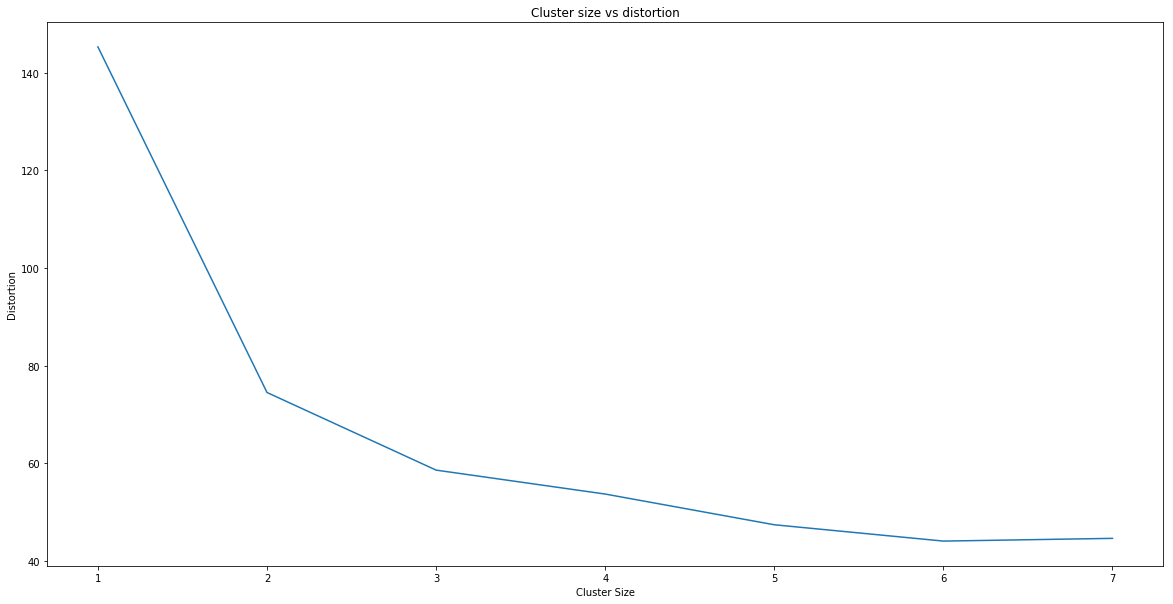

In [522]:
plt.figure(figsize=(20, 10))
plt.title("Cluster size vs distortion")
plt.plot(k, distortions)
plt.xlabel("Cluster Size")
plt.ylabel("Distortion")
plt.show()

## Clustering using Euclidian Distance

In [523]:
kmeans = KmeansCluster(x, y, cosineDistance, 3, 100)
print("Cluster distortion "+str(kmeans.distortion))

KMeans converged
Cluster distortion 59.76029027764922


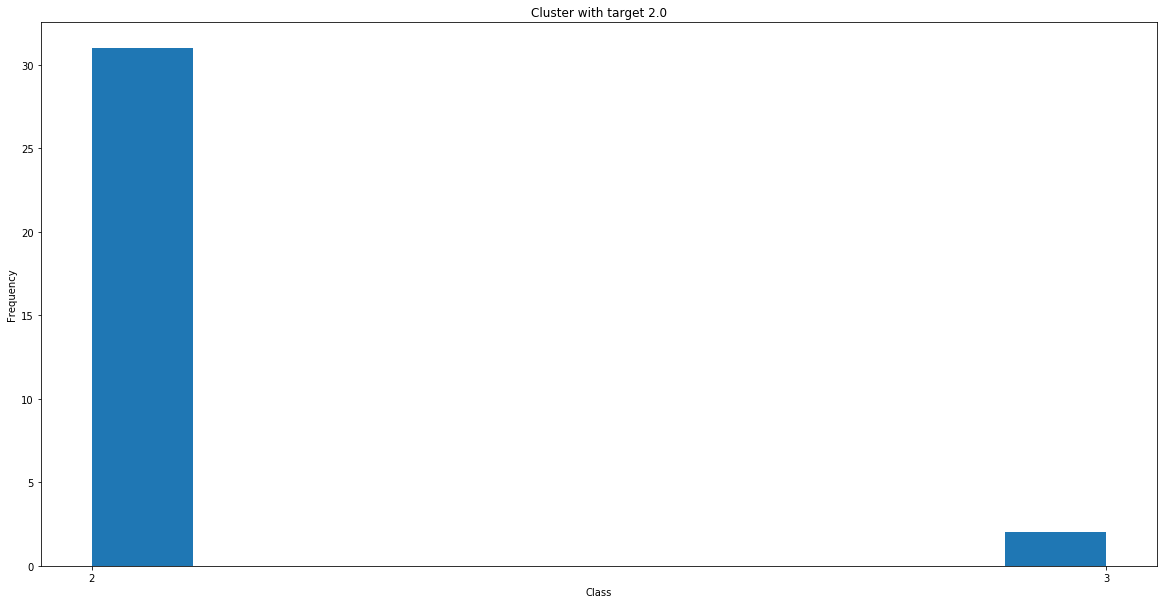

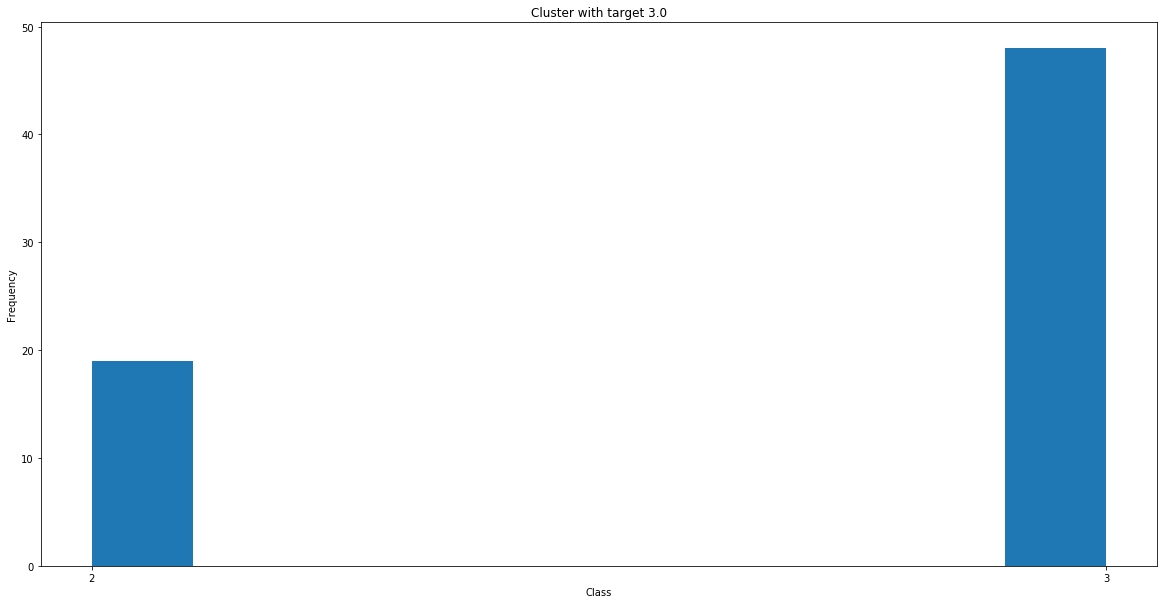

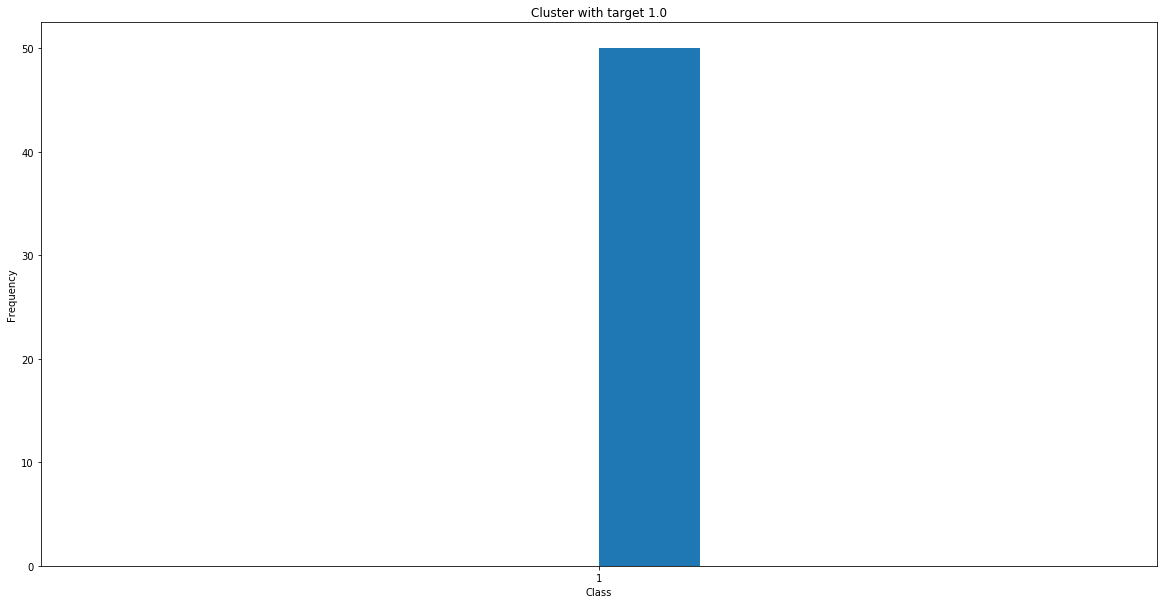

In [524]:
kmeans.plotClusterQuality()

In [525]:
k = range(1, 8)
distortionsCosine = []

for i in k:
    kmeans = KmeansCluster(x, y, euclideanDistance, i, 100)
    distortionsCosine.append(kmeans.distortion)

KMeans converged
KMeans converged
KMeans converged
KMeans converged
KMeans converged
KMeans converged
KMeans converged


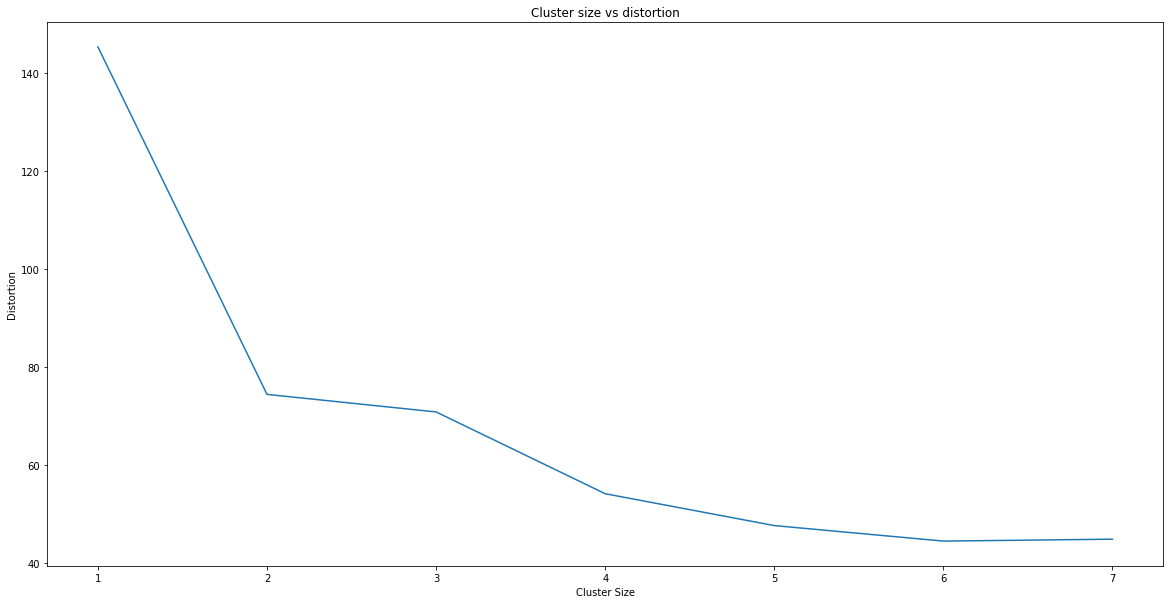

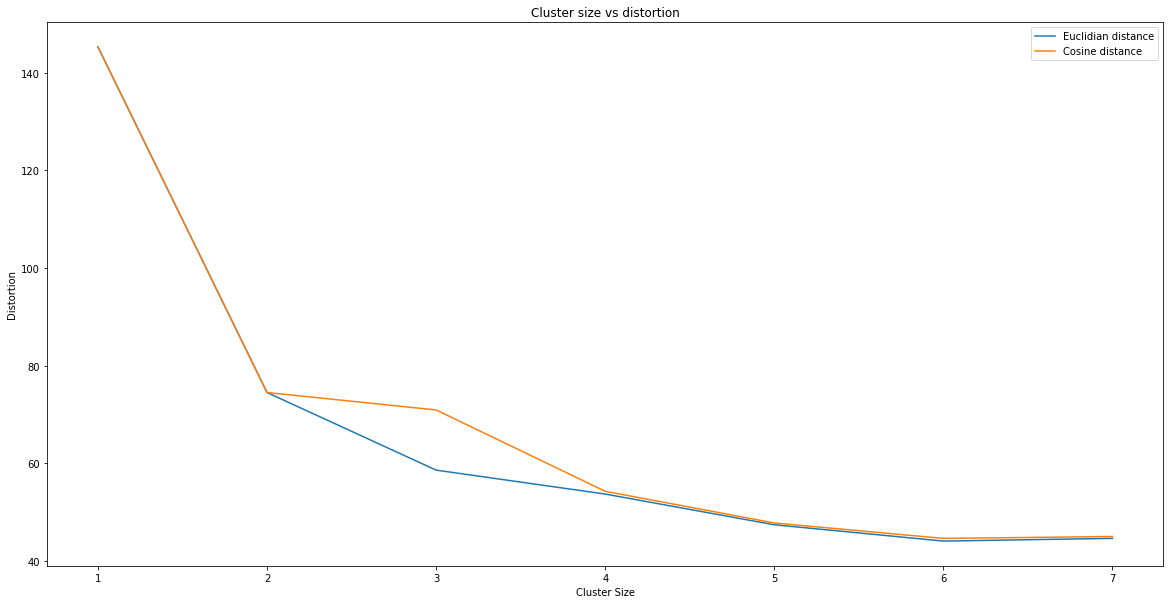

In [526]:
plt.figure(figsize=(20, 10))
plt.title("Cluster size vs distortion")
plt.plot(k, distortionsCosine)
plt.xlabel("Cluster Size")
plt.ylabel("Distortion")
plt.show()


plt.figure(figsize=(20, 10))
plt.title("Cluster size vs distortion")
plt.plot(k, distortions, label = "Euclidian distance")
plt.plot(k, distortionsCosine, label = "Cosine distance")
plt.legend()
plt.xlabel("Cluster Size")
plt.ylabel("Distortion")
plt.show()